## ▣ 풀어야 하는 문제

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import matplotlib

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [5]:
#df_seoul_bus_station 파일 불러오기 
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')

In [6]:
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [7]:
# df_seoul_moving 파일 불러오기 
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')

In [8]:
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y
0,11010,21.867754,46.046219,5471640,1.152145e+07
1,11020,21.524817,46.214336,5368440,1.152618e+07
2,11030,21.820458,38.412082,4959790,8.731066e+06
3,11040,22.150334,44.717847,5139830,1.037646e+07
4,11050,22.810568,50.043326,5020720,1.101479e+07


In [9]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [10]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [11]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,5139830,1.037646e+07
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,5020720,1.101479e+07


In [12]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.457965,0.639658,0.276925,0.531874
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.199466,0.387141,0.359348,0.370605
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.693565,-0.013633,0.360500,0.188197
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.146534,0.472734,0.572455,0.568742
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.135064,0.460952,0.564608,0.550686
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.410118,-0.080959,0.124998,0.051692
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.387490,-0.076575,0.133859,0.045831
평균 이동 시간(분)_x,0.457965,0.199466,-0.693565,-0.146534,-0.135064,-0.410118,-0.387490,1.000000,0.360419,-0.125621,0.120281
이동인구(합)_x,0.639658,0.387141,-0.013633,0.472734,0.460952,-0.080959,-0.076575,0.360419,1.000000,0.812646,0.963787
평균 이동 시간(분)_y,0.276925,0.359348,0.360500,0.572455,0.564608,0.124998,0.133859,-0.125621,0.812646,1.000000,0.908128


### 가설1 정류장 수와 승차 총 승객수는 관계가 있다.
승차 총 승객수와 하차 총 승객수 둘의 상관관계는 거의 1에 가깝기 때문에 승차 총 승객수 변수를 하나 택하여 분석해보았다. 

* H0 : 정류장 수와 승차 총 승객수는 연관이 없다.
* H1 : 정류장 수와 승차 총 승객수는 연관이 있다.

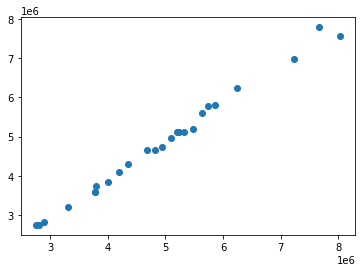

In [13]:
plt.scatter(df["승차총승객수"],df["하차총승객수"])
plt.show()

In [14]:
spst.pearsonr(df["승차총승객수"],df["하차총승객수"])
# 관계가 유의하고 상관계수가 거의 1에 가깝다. 

(0.996609973515673, 1.8553303980746363e-26)

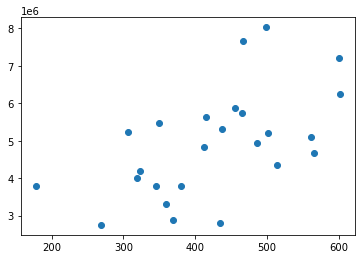

In [15]:
plt.scatter(df["정류장수"],df["승차총승객수"])
plt.show()

In [16]:
spst.pearsonr(df['정류장수'],df['승차총승객수'])

# 강한 양의 상관관계
# p_value가 0.003 < 0.05 이기 때문에 유의하다고 볼 수 있고 0.56으로 상관관계가 나타난다고 말할 수 있다. 

(0.5666813370974585, 0.003141977397117322)

In [17]:
df['비율1'] = df['정류장수'] / df['승차총승객수'] * 10000
df.sort_values(by=['비율1'])

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,22.149241,41.037280,5132710,9.509692e+06,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.480725,53.024888,5150450,1.163090e+07,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.418794,104.437297,6543820,2.918250e+07,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07,0.638150
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.735699,94.938240,6234190,2.299774e+07,0.735588
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06,0.770887
12,11130,서대문구,456,107,5863499,5796960,109.914502,108.667192,22.411314,46.134844,4952990,1.019598e+07,0.777693
14,11150,양천구,319,56,4009172,3851173,97.627526,93.780086,23.209394,49.140477,4383860,9.281801e+06,0.795676
18,11190,영등포구,465,101,5739875,5783211,120.337855,121.246404,21.745571,61.736901,5525180,1.568630e+07,0.810122


In [18]:
df.sort_values(by='비율1', ascending=True).head(5) 
# 중구, 동대문구, 관악구, 강남구, 종로구 순으로 정류장별 승객이용수가 많다는 것을 알 수 있습니다. 

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y,비율1
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07,0.471314
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,22.149241,41.037280,5132710,9.509692e+06,0.583907
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.480725,53.024888,5150450,1.163090e+07,0.608687
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,23.418794,104.437297,6543820,2.918250e+07,0.621382
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07,0.638150


In [19]:
import warnings
warnings.filterwarnings(action='ignore')
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

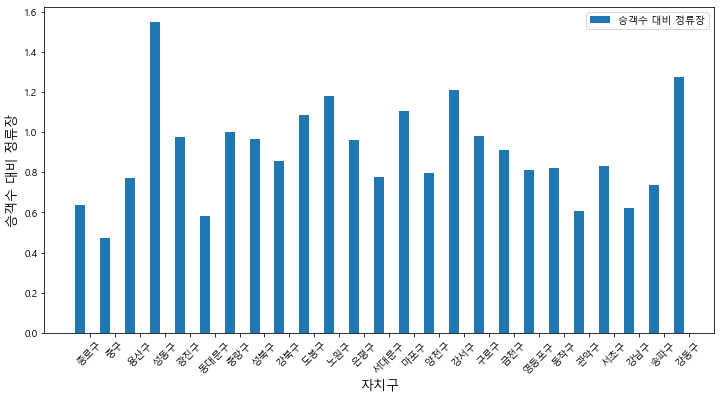

In [20]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.4

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(25)

b1 = plt.bar(index, df['비율1'] , bar_width, label='승객수 대비 정류장')

# x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 25+bar_width,1), df["자치구"], rotation = 45)

# x축, y축 이름 및 범례 설정
plt.xlabel('자치구', size = 13)
plt.ylabel('승객수 대비 정류장', size = 13)
plt.legend()
plt.show()


#### 위 정보로부터 파악한 내용 정리
* 중구, 동대문구, 관악구, 강남구, 종로구 순으로 승객수 대비 정류장이 적기 때문에 해당 자치구에 버스 정류장을 추가해야한다. 

#### 추가 분석해볼 사항 도출
* 앞에서 언급한 자치구를 동으로 세분화하여 추가 분석을 해보면 좋을 것 같다. 

## 가설2 노선 수와 평균 이동시간은 관계가 있다.

* H0 : 노선 수와 평균 이동 시간은 연관이 없다.
* H1 : 노선 수와 평균 이동 시간은 연관이 있다.

In [21]:
spst.pearsonr(df['노선수'],df['평균 이동 시간(분)_x'])

# 강한 양의 상관관계
# p_value가 0.000120 < 0.05 이기 때문에 유의하다고 볼 수 있고 -0.69으로 상관관계가 나타난다고 말할 수 있다.

(-0.6935652960828838, 0.00012083974762338667)

In [24]:
target = '노선수'
feature = '평균 이동 시간(분)_x'

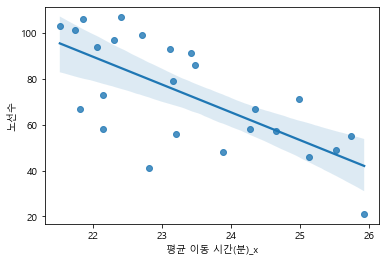

In [25]:
sns.regplot(x=feature, y=target, data=df)
plt.show()

#### 위 정보로부터 파악한 내용 정리
* p값이 작고, 상관계수가 -0.7인것으로 보아 강한 음의 상관관계가 있다
* 생각했던것과 달리 노선수가 많은 곳에서 평균 이동 시간이 짧다
* 서울 내에서의 승하차만 분석했기에 이러한 결과가 나왔을 것으로 추정된다

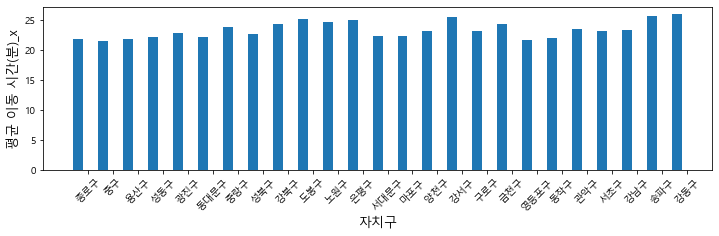

In [29]:
# 경기도로 확장시키면 다른 결과가 나올 수도 있을 것 같다
# 서울 내 현재 결과로썬 이동시간이 짧은 곳에 노선수를 추가 해야한다.

fig, ax = plt.subplots(figsize=(12,3))
bar_width = 0.4

index = np.arange(25)

b1 = plt.bar(index, df['평균 이동 시간(분)_x'], bar_width,)

plt.xticks(np.arange(bar_width, 25+bar_width,1), df["자치구"], rotation = 45)

# x축, y축 이름 및 범례 설정
plt.xlabel('자치구', size = 13)
plt.ylabel('평균 이동 시간(분)_x', size = 13)
plt.show()


## 가설 3 65세 이용자와 정거장수는 상관관계가 존재한다.

* H0 : 65세 이용자 수와 정류장수은 연관이 없다.
* H1 : 65세 이용자 수와 정류장수은 연관이 있다.

In [ ]:
df_seoul_people = pd.read_csv("df_seoul_people.csv")

In [ ]:
df_all_people = pd.merge(df_seoul_people,df,how="inner",on='자치구')
df_all_people.head(5)

In [ ]:
plt.scatter(df_all_people["65세이상고령자"],df_all_people["정류장수"])
plt.show()

In [ ]:
spst.pearsonr(df_all_people["65세이상고령자"],df_all_people["정류장수"])

In [ ]:
# 평균치보다 높은 정류장별고령자승객수를 가지고 있는 구를 중심으로 살펴보자. 
df_all_people["정류장별고령자승객수"]=df_all_people["65세이상고령자"]/df_all_people["정류장수"]
df_all_people

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="자치구",y="정류장별고령자승객수",data=df_all_people)
plt.axhline(y=df_all_people["정류장별고령자승객수"].mean(),color="r")
plt.show()

In [ ]:
# 송파구는 노인 수에 비해 노인의 시설 공급이 적어 시설을 이용하기위해서는 이동을 할 가능성이 있다.
# 따라서 다음과 같은 결과가 나오나..? 짐작을 해볼 수 있다. 
# 참고 - https://www.sedaily.com/NewsView/22RIGNHXNW
# 정류장을 늘리거나 노인 복지시설을 만드는 것도 하나의 개선책이라 볼 수 있을 것이다. 

# 추가분석사항 
# 송파구 내에 있는 실제 노인시설 공급이 적은지 확인을 해보기 위해 추가분석이 필요하다. 

## 4.관계 정리

### 강한 관계의 변수

* 정류장 수와 승차 총 승객수

* 65세 고령자와 정거장수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

* 가설1에 따르면 중구, 동대문구, 관악구, 강남구, 종로구
* 가설3에 따르면 송파구, 양천구, 강동구, 동대문구, 광진구

* 두개의 가설에 따르면 동대문구가 중복되기 때문에 유력한 후보지가 될 수 있다. 